In [270]:
import numpy as np
import scipy.io as scio
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize']=(15,10)   # 设置图表的大小

In [271]:
# 载入数据集，并查看数据集基本信息
matfilepath='20news_w100.mat'
data=scio.loadmat(matfilepath)
print('data数据类型为：{0},\ndata中包含的键为：{1}'.format(type(data),data.keys()))

data数据类型为：<class 'dict'>,
data中包含的键为：dict_keys(['__globals__', 'wordlist', 'newsgroups', 'documents', '__header__', '__version__', 'groupnames'])


In [272]:
# 查看文本的基本信息，X的形状为(100,16242)，其中100为单词数量，16242为文本数量
X = data['documents']
print('X的数据类型为：{0},\nX的形状为：{1}'.format(type(X),X.shape))

X的数据类型为：<class 'scipy.sparse.csc.csc_matrix'>,
X的形状为：(100, 16242)


In [273]:
# 对X进行转置，形成（16242,100）的矩阵
X = X.T  # 对X进行转置
print(X.shape,type(X))

(16242, 100) <class 'scipy.sparse.csr.csr_matrix'>


In [274]:
# 查看所有文本对应的标签向量y
y = data['newsgroups']
print('所有文本对应的标签向量y类型为：{0},形状为：{1}'.format(type(y),y.shape))
# 查看所有文本中具有的类的数量
classlabels = data['groupnames']
print(type(classlabels),classlabels.shape)

所有文本对应的标签向量y类型为：<class 'numpy.ndarray'>,形状为：(1, 16242)
<class 'numpy.ndarray'> (1, 4)


In [275]:
# 对每个文本中的单词数量进行统计
nwords=np.sum(X,1)   # 统计每个文档中的单词数量
print(nwords.shape,'\n',nwords[:5],type(nwords))   # 打印前5个数据

(16242, 1) 
 [[5]
 [1]
 [3]
 [3]
 [4]] <class 'numpy.matrixlib.defmatrix.matrix'>


In [276]:
# 根据统计的文本单词数量，提取单词数量最多的前1000个文本
word_num_index = np.argsort(-nwords,axis=0)    # 获取降序排序后的索引值
print(word_num_index.shape,type(word_num_index))
index_1000 = np.array(word_num_index[:1000])         # 提取前1000个单词的索引值
print(index_1000.shape,type(index_1000))

(16242, 1) <class 'numpy.matrixlib.defmatrix.matrix'>
(1000, 1) <class 'numpy.ndarray'>


In [277]:
XX=X[index_1000.flatten()].toarray()   #根据提取的1000个索引值，对X进行花式索引
yy=y.T[index_1000.flatten()]           #同样对每个文本的标签值进行花式索引
print(type(XX),XX.shape)               # 输出查看相关结果的数据类型
print(type(yy),yy.shape)
new_yy=np.sort(yy,axis=0)              # 对yy进行升序排列，将不同的类归置到一起
index_of_yy=np.argsort(yy,axis=0)      # 获取排序后的索引值
XX=XX[index_of_yy.flatten()]           # 根据获得的索引值对XX进行花式索引
print(XX.shape)

<class 'numpy.ndarray'> (1000, 100)
<class 'numpy.ndarray'> (1000, 1)
(1000, 100)


In [278]:
yy_unique=np.unique(new_yy)   # 获取标签中的不重合类别
print(yy_unique)

[1 2 3 4]


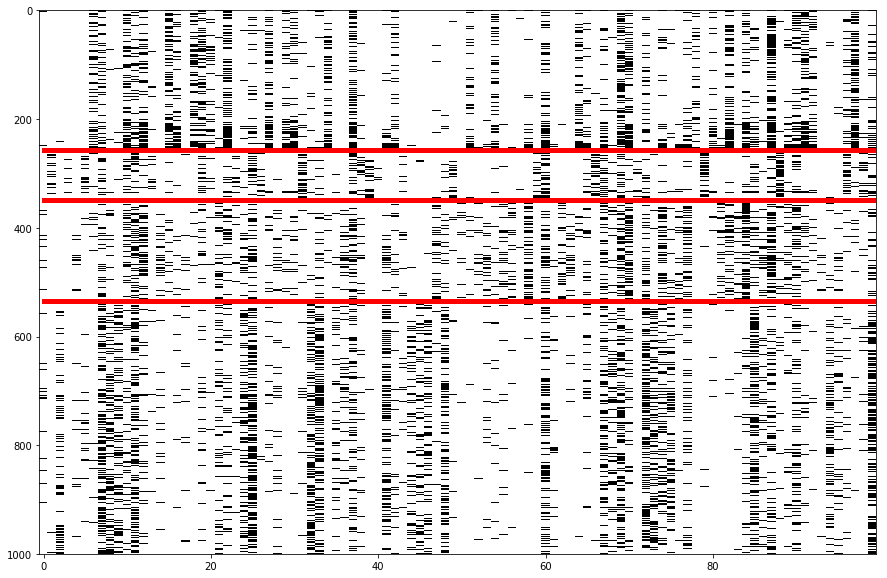

In [279]:
ax = plt.gca()
ax.imshow(XX,cmap=plt.cm.gray_r,aspect='auto')  # 根据矩阵绘制灰度图
# 绘制划分类别的分界线
for label in yy_unique[:-1]:
    label_index = np.where(new_yy.flatten()==label)[-1][-1]
    line1 = [(0, label_index), (XX.shape[1],label_index)]
    (line1_xs, line1_ys) = zip(*line1)
    ax.add_line(Line2D(line1_xs, line1_ys, linewidth=5, color='red'))